In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/MachineLearning/Project/

Mounted at /content/drive
/content/drive/MyDrive/MachineLearning/Project


In [3]:
data = pd.read_csv('housing.csv')

# Check the column names
print(data.head())
print(data.count())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
longitude             20640
latitude              20640
housing_median_age 

In [4]:
for column in data.columns[:-1]:  # Exclude the last column (categorical feature)
    if data[column].dtype == 'float64' or data[column].dtype == 'int64':
        data[column].fillna(data[column].median(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)

In [5]:
label_encoder = LabelEncoder()
data[data.columns[-1]] = label_encoder.fit_transform(data[data.columns[-1]])

In [6]:
print(data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [7]:
print(data.head())
print(data.count())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_proximity  
0       322.0       126.0         8.3252            452600.0                3  
1      2401.0      1138.0         8.3014            358500.0                3  
2       496.0       177.0         7.2574            352100.0                3  
3       558.0       219.0         5.6431            341300.0                3  
4       565.0       259.0         3.8462            342200.0                3  
longitude             20640
latitude              20640
housing_media

In [8]:
X=data.drop(columns=["median_house_value"])


y=data["median_house_value"]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

In [12]:
mseDT = mean_squared_error(y_test, y_pred_dt)
print('Root mean squared error from Decision Tree Classifier = ')
print(mseDT)

Root mean squared error from Decision Tree Classifier = 
5874046216.657946


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)
# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

# Linear Regression
linear_reg = LinearRegression()
rmse_linear = evaluate_model(linear_reg, X_train, X_test, y_train, y_test)

# Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42)
rmse_tree = evaluate_model(tree_reg, X_train, X_test, y_train, y_test)

# Random Forest Regression
forest_reg = RandomForestRegressor(random_state=42)
rmse_forest = evaluate_model(forest_reg, X_train, X_test, y_train, y_test)

print(f'RMSE - Linear Regression: {rmse_linear}')
print(f'RMSE - Decision Tree Regression: {rmse_tree}')
print(f'RMSE - Random Forest Regression: {rmse_forest}')

RMSE - Linear Regression: 71147.871461184
RMSE - Decision Tree Regression: 68511.25428149624
RMSE - Random Forest Regression: 50231.07677846623


In [14]:
#Interpreting results

feature_importances = forest_reg.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(importance_df)

              Feature  Importance
7       median_income    0.519625
8     ocean_proximity    0.109350
1            latitude    0.107798
0           longitude    0.105225
2  housing_median_age    0.055058
5          population    0.034408
4      total_bedrooms    0.024813
3         total_rooms    0.024733
6          households    0.018990


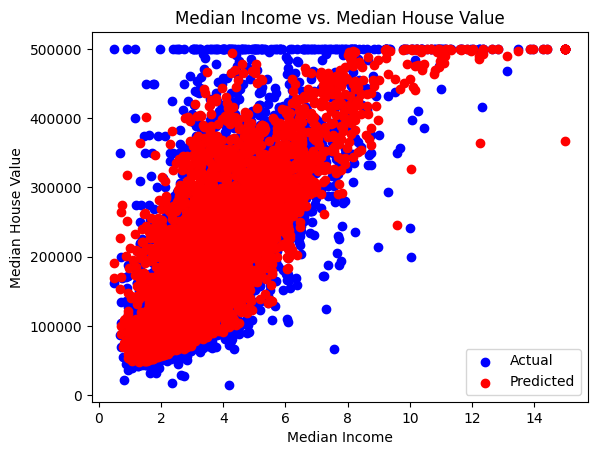

In [15]:
plt.scatter(X_test['median_income'], y_test, color='blue', label='Actual')
plt.scatter(X_test['median_income'], forest_reg.predict(X_test), color='red', label='Predicted')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs. Median House Value')
plt.legend()
plt.show()

RMSE: 97018.04547892926


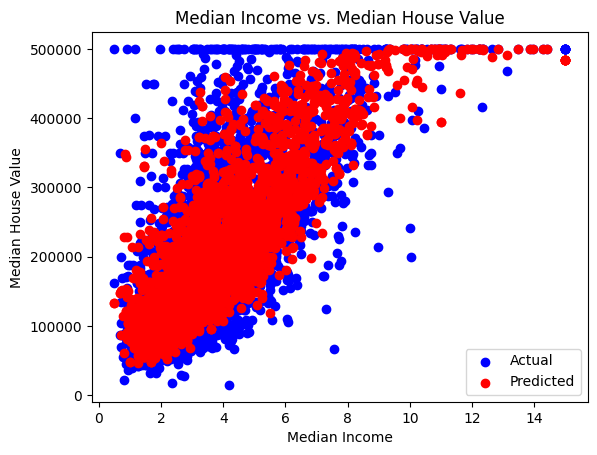

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


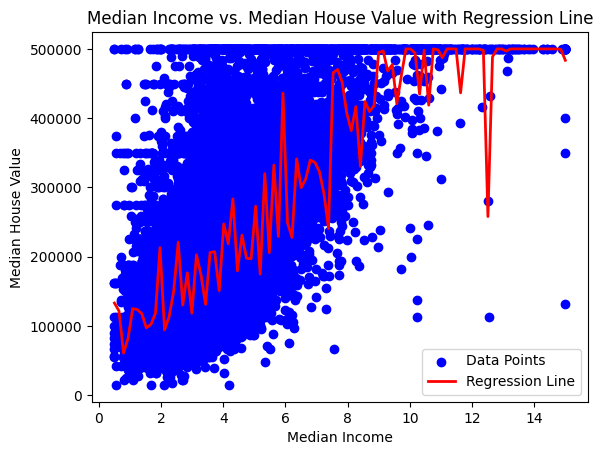

In [16]:
# Prepare the features and target variable
# Assuming 'median_house_value' is the target and 'median_income' is one of the features
X = data[['median_income']]
y = data['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = forest_reg.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Plot actual vs. predicted values
plt.scatter(X_test['median_income'], y_test, color='blue', label='Actual')
plt.scatter(X_test['median_income'], y_pred, color='red', label='Predicted')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs. Median House Value')
plt.legend()
plt.show()

# Plot the regression line (for RandomForestRegressor, this is an approximation)
X_range = np.linspace(X['median_income'].min(), X['median_income'].max(), 100).reshape(-1, 1)
y_range_pred = forest_reg.predict(X_range)

plt.scatter(X['median_income'], y, color='blue', label='Data Points')
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs. Median House Value with Regression Line')
plt.legend()
plt.show()